# Laboratory 1
## Aga Patro

### Configuration


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
import json as js
from random import uniform, random, seed, randint
from math import pi, sin, cos

### Interface


In [3]:
class PointsCollection:
    def __init__(self, points = [], color = 'mediumorchid', marker = None):
        self.points = np.array(points)
        self.color = color
        self.marker = marker
        
class LinesCollection:
    def __init__(self, lines = [], color = 'violet'):
        self.color = color
        self.lines = lines
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        if self.color:
            return mcoll.LineCollection(self.lines, [mcolors.to_rgba(self.color)] * len(lines))
        else:
            return mcoll.LineCollection(self.lines)

class Plot:
    def __init__(self, points=[], lines=[], json = None):
        if json is None:
            self.points = points
            self.lines = lines
        else:
            self.points = [PointsCollection(pointsCol) for pointsCol in js.loads(json)["points"]]
            self.lines = [LinesCollection(linesCol) for linesCol in js.loads(json)["lines"]]
            
    def draw(self):
        ax = plt.axes()
        for collection in self.points:
            if collection.points.size > 0:
                ax.scatter(*zip(*collection.points), c=collection.color, marker=collection.marker)
        for collection in self.lines:
            ax.add_collection(collection.get_collection())
        ax.autoscale()
        plt.draw()
        
    def toJSON(self):
        return js.dumps({"points": [pointCol.points.tolist() for pointCol in self.points], 
                          "lines":[linesCol.lines for linesCol in self.lines]})

### Solution

    exc. 1 + exc. 2: Przygotuj następujące zbiory punktów (2D, współrzędne rzeczywiste typu double) + uruchom       wizualizację graficzną utworzonych zbiorów punktów.

    a) 10^5 losowych punktów o współrzędnych z przedziału [-1000, 1000]

<IPython.core.display.Javascript object>


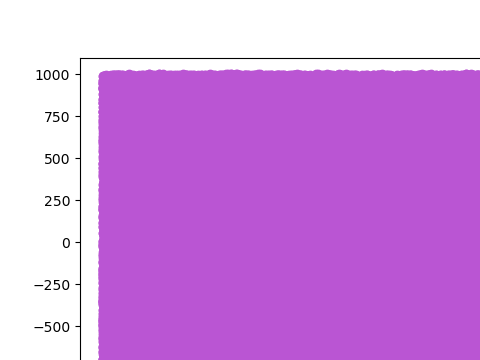

In [14]:
%matplotlib notebook
points_1 = []
for _ in range(10**5):
    x = randint(-1000, 1000)
    y = randint(-1000, 1000)
    points_1.append((x, y))
    
Plot([PointsCollection(points_1)]).draw()


    b) 10^5 losowych punktów o współrzędnych z przedziału [-10^14, 10^14],

<IPython.core.display.Javascript object>


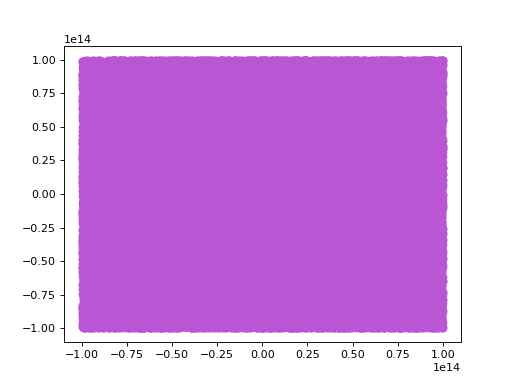

In [5]:
%matplotlib notebook
points_2 = []
for _ in range(10**5):
    x = randint(-(10**14), 10**14)
    y = randint(-(10**14), 10**14)
    points_2.append((x, y))
    
Plot([PointsCollection(points_2)]).draw()

    c) 1000 losowych punktów leżących na okręgu o środku (0,0) i promieniu R=100,

<IPython.core.display.Javascript object>


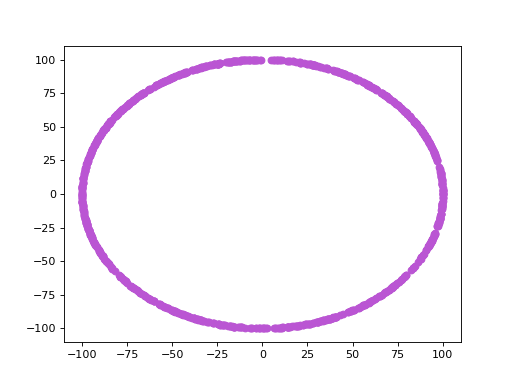

In [6]:
%matplotlib notebook
points_3 = []
radius = 100
for _ in range(1000):
    a = random() * 2 * pi
    x = radius * sin(a)
    y = radius * cos(a)
    points_3.append((x, y))

Plot([PointsCollection(points_3)]).draw()

    d) 1000 losowych punktów o współrzędnych z przedziału [-1000, 1000] leżących na prostej wyznaczonej przez 
    wektor (a, b)
          
    przyjmij a = [-1.0, 0.0], b = [1.0, 0.1]
    
    Współczynniki prostej:
    0.0 = a * (-1.0) + b      --> a = 0.05
    0.1 = a * (1.0) + b       --> b = 0.05
        

<IPython.core.display.Javascript object>


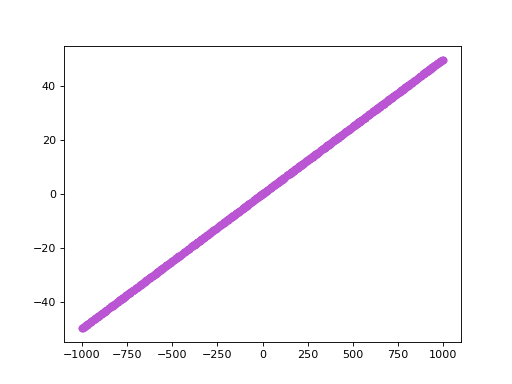

In [7]:
%matplotlib notebook
a = 0.05
b = 0.05
points_4 = []
for _ in range(1000):
    x = randint(-1000, 1000)
    y = a * x + b
    points_4.append((x, y))

Plot([PointsCollection(points_4)]).draw()

-------------------------------------------------------------------------------------------------------------------

    Przygotuj program, który dla każdego ze zbioru danych dokona podziału punktów względem ich
    orientacji w stosunku do odcinka ab ( a = [-1.0, 0.0], b = [1.0, 0.1] – punkty znajdujące się po
    lewej stronie, po prawej stronie oraz współliniowe. Obliczenia wykonaj przy pomocy
    wyznacznika (1) i następnie (2) zaimplementowanego samodzielnie. Wyszukaj w bibliotekach
    numerycznych procedury obliczania wyznacznika 3x3 i 2x2. Dla każdego zbioru danych
    porównaj wyniki (podział punktów) uzyskane przy pomocy obu wyznaczników wyliczanych
    procedurami własnymi i bibliotecznymi. Określ, ile punktów (i jakich) zostało inaczej
    zakwalifikowanych dla różnych sposobów liczenia wyznacznika. Zbadaj wyniki dla różnej
    tolerancji dla zera oraz różnych precyzji obliczeń. Odpowiednio zaprezentuj otrzymane wyniki
    w tabelach. 

In [5]:
def det_3(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return a_x*b_y + b_x*c_y + a_y*c_x - b_y*c_x - c_y*a_x - a_y*b_x

In [6]:
def det_2(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    return (a_x-c_x)*(b_y-c_y) - (a_y-c_y)*(b_x-c_x)

In [7]:
def det_3_np(a, b, c): 
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = np.array([[a_x, a_y, 1],
                         [b_x, b_y, 1],
                         [c_x, c_y, 1]])
    det_ = np.linalg.det(matrix)
    return det_

In [8]:
def det_2_np(a, b, c):
    a_x, a_y = a
    b_x, b_y = b
    c_x, c_y = c
    matrix = np.array([[a_x-c_x, a_y-c_y],
                         [b_x-c_x, b_y-c_y]])
    det_ = np.linalg.det(matrix)
    return det_

In [9]:
def points_classifier(points, det_method, e, a=[-1.0, 0.0], b=[1.0, 0.1]):
    what = {
        'left': 0,
        'collinear': 1,
        'right': 2
    }
    answear = [[] for _ in range(3)]
    
    for c in points:
        det = det_method(a, b, c)
        if det < -1*e:
            answear[what['right']].append(c)
        elif det > e:
            answear[what['left']].append(c)
        else:
            answear[what['collinear']].append(c)
    
    return answear, what   

In [10]:
def show_result(points, det_method, set_number, det_way, e):
    answear, what = points_classifier(points, det_method, e)
    points = [PointsCollection(answear[what['left']], color = 'mediumpurple'),
          PointsCollection(answear[what['right']], color = 'plum'),
          PointsCollection(answear[what['collinear']], color = 'darkmagenta')]
    
    message = "Figure for set {}, det counted: {}".format(set_number, det_way)
    print(message)
    Plot(points).draw()
    print("Left: ",len(answear[what['left']]))
    print("Right: ",len(answear[what['right']]))
    print("Collinear: ",len(answear[what['collinear']]))

Figure for set 1, det counted: 2x2, numpy way


<IPython.core.display.Javascript object>


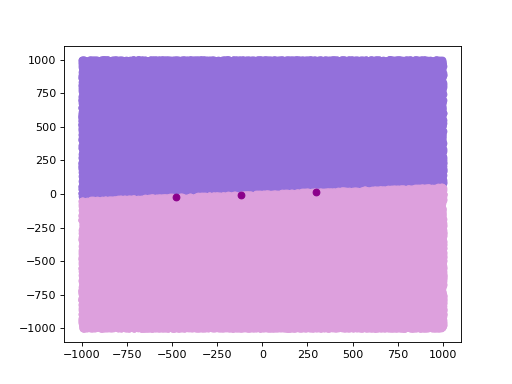

Left:  50105
Right:  49892
Collinear:  3


In [14]:
%matplotlib notebook
show_result(points_1, det_2_np, 1, '2x2, numpy way', 10**-14)

Figure for set 1, det counted: 2x2, my function


<IPython.core.display.Javascript object>


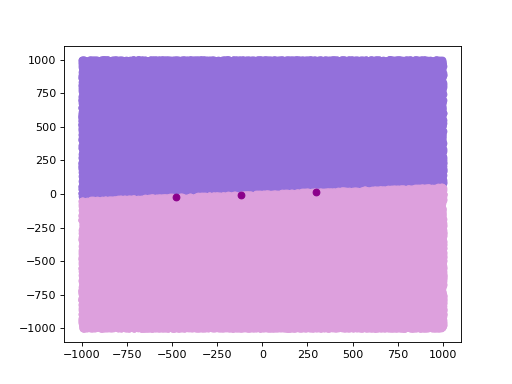

Left:  50105
Right:  49892
Collinear:  3


In [15]:
%matplotlib notebook
show_result(points_1, det_2, 1, '2x2, my function', 10**-14)

Figure for set 1, det counted: 3x3, numpy method


<IPython.core.display.Javascript object>


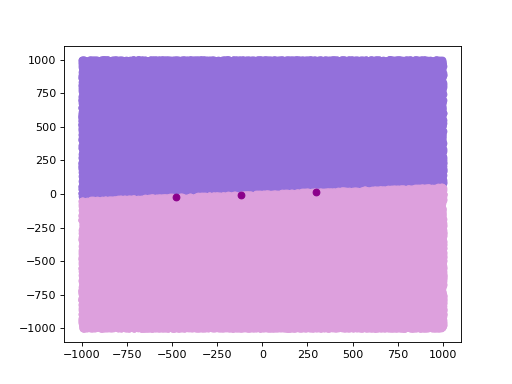

Left:  50105
Right:  49892
Collinear:  3


In [16]:
%matplotlib notebook
show_result(points_1, det_3_np, 1, '3x3, numpy method', 10**-14)

Figure for set 1, det counted: 3x3, my function


<IPython.core.display.Javascript object>


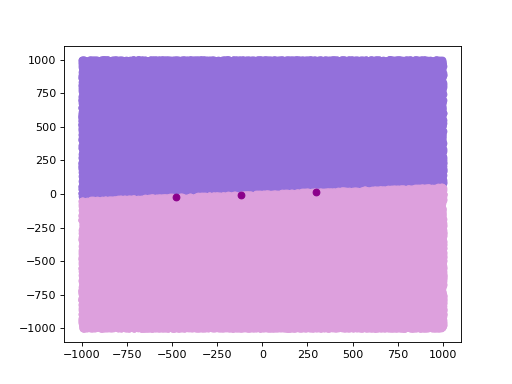

Left:  50105
Right:  49892
Collinear:  3


In [17]:
%matplotlib notebook
show_result(points_1, det_3, 1, '3x3, my function', 10**-14)

Figure for set 2, det counted: 2x2, numpy method


<IPython.core.display.Javascript object>


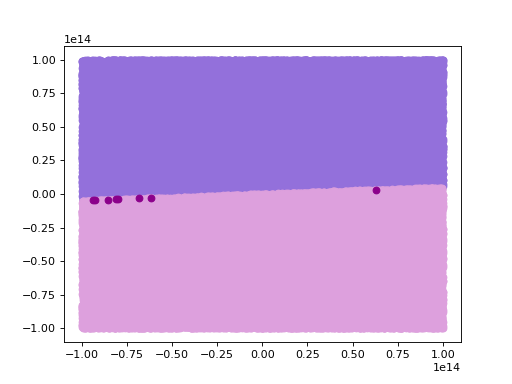

Left:  49909
Right:  50083
Collinear:  8


In [28]:
%matplotlib notebook
show_result(points_2, det_2_np, 2, '2x2, numpy method', 10**-14)

Figure for set 2, det counted: 2x2, my function


<IPython.core.display.Javascript object>


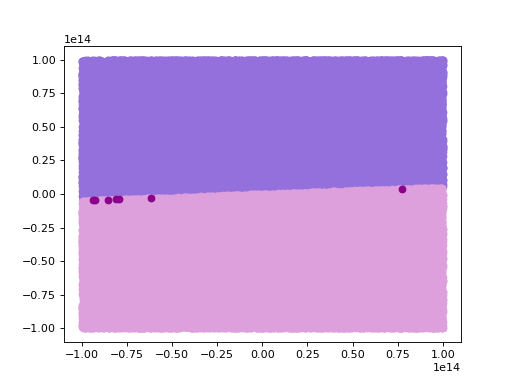

Left:  49909
Right:  50084
Collinear:  7


In [29]:
%matplotlib notebook
show_result(points_2, det_2, 2, '2x2, my function', 10**-14)

Figure for set 2, det counted: 3x3, numpy method


<IPython.core.display.Javascript object>


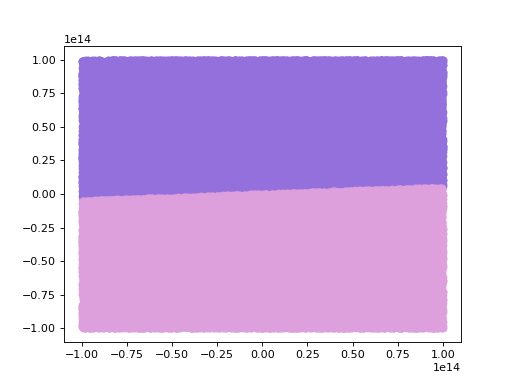

Left:  49912
Right:  50088
Collinear:  0


In [30]:
%matplotlib notebook
show_result(points_2, det_3_np, 2, '3x3, numpy method', 10**-14)

Figure for set 2, det counted: 3x3, my function


<IPython.core.display.Javascript object>


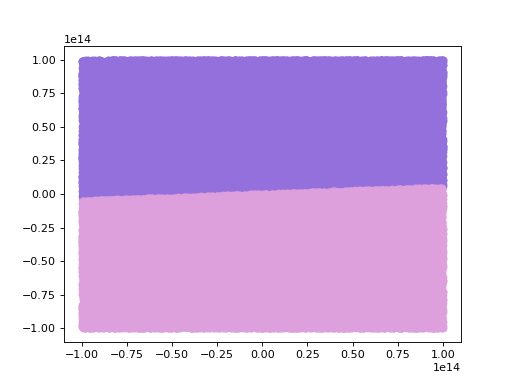

Left:  49912
Right:  50088
Collinear:  0


In [31]:
%matplotlib notebook
show_result(points_2, det_3, 2, '3x3, my function', 10**-14)

Figure for set 3, det counted: 2x2, numpy method


<IPython.core.display.Javascript object>


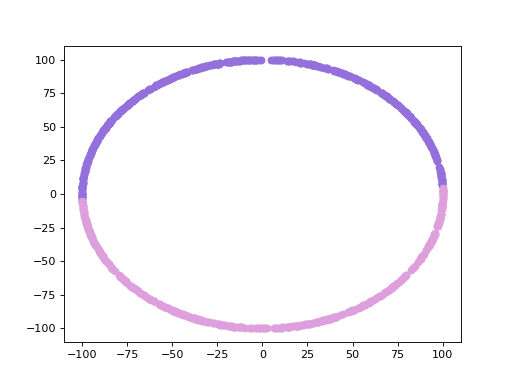

Left:  513
Right:  487
Collinear:  0


In [19]:
%matplotlib notebook
show_result(points_3, det_2_np, 3, '2x2, numpy method', 10**-14)

Figure for set 3, det counted: 2x2, my function


<IPython.core.display.Javascript object>


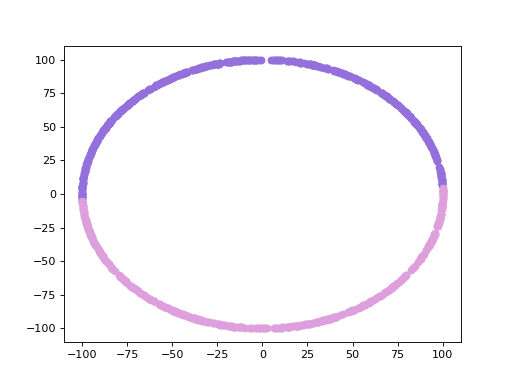

Left:  513
Right:  487
Collinear:  0


In [18]:
%matplotlib notebook
show_result(points_3, det_2, 3, '2x2, my function', 10**-14)

Figure for set 3, det counted: 3x3, numpy method


<IPython.core.display.Javascript object>


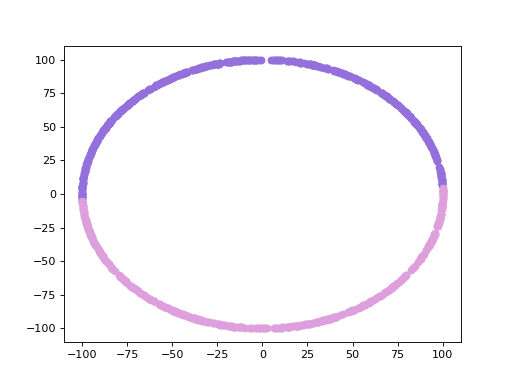

Left:  513
Right:  487
Collinear:  0


In [21]:
%matplotlib notebook
show_result(points_3, det_3_np, 3, '3x3, numpy method', 10**-14)

Figure for set 3, det counted: 3x3, my function


<IPython.core.display.Javascript object>


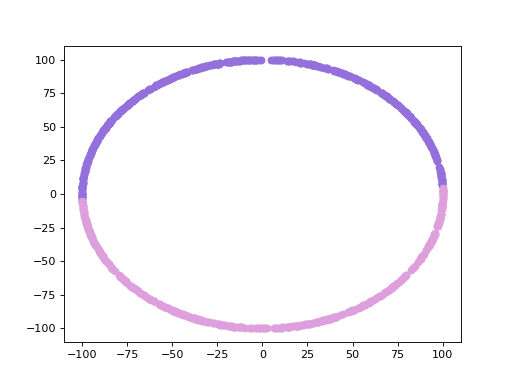

Left:  513
Right:  487
Collinear:  0


In [20]:
%matplotlib notebook
show_result(points_3, det_3, 3, '3x3, my function', 10**-14)

Figure for set 4, det counted: 2x2, numpy method


<IPython.core.display.Javascript object>


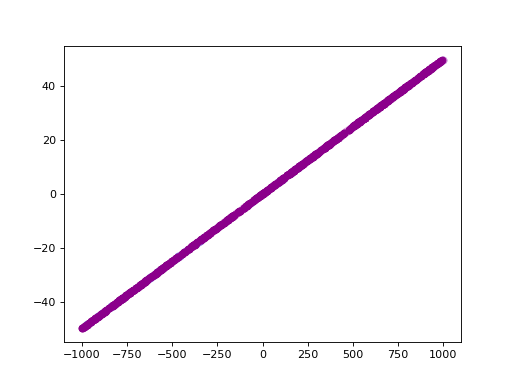

Left:  115
Right:  145
Collinear:  740


In [23]:
%matplotlib notebook
show_result(points_4, det_2_np, 4, '2x2, numpy method', 10**-14)

Figure for set 4, det counted: 2x2, my function


<IPython.core.display.Javascript object>


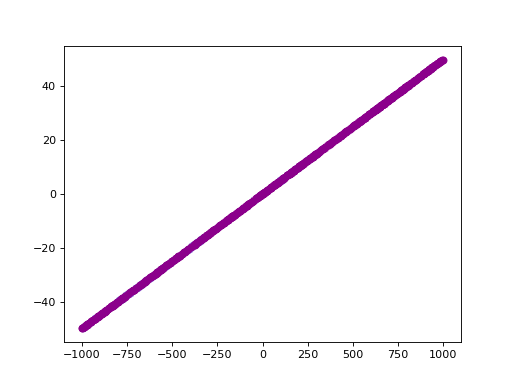

Left:  165
Right:  129
Collinear:  706


In [22]:
%matplotlib notebook
show_result(points_4, det_2, 4, '2x2, my function', 10**-14)

Figure for set 4, det counted: 3x3, numpy method


<IPython.core.display.Javascript object>


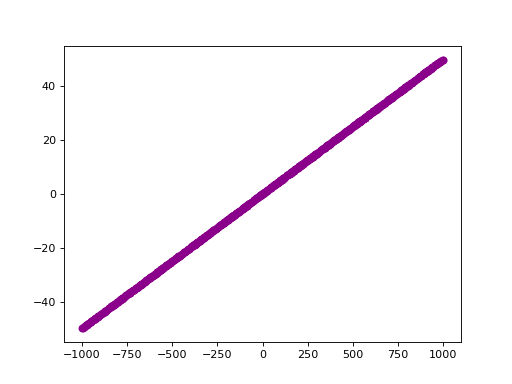

Left:  7
Right:  97
Collinear:  896


In [25]:
%matplotlib notebook
show_result(points_4, det_3_np, 4, '3x3, numpy method', 10**-14)

Figure for set 4, det counted: 3x3, my function


<IPython.core.display.Javascript object>


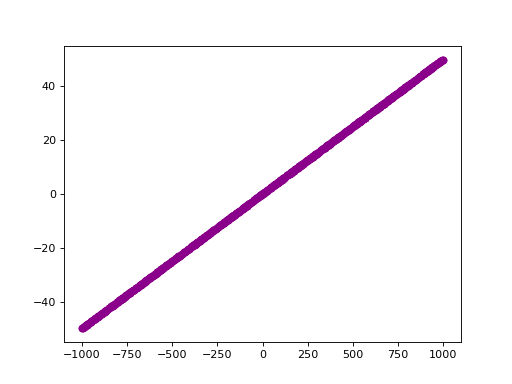

Left:  0
Right:  0
Collinear:  1000


In [24]:
%matplotlib notebook
show_result(points_4, det_3, 4, '3x3, my function', 10**-14)

In [58]:
def count(set_1, set_2, result_set):
    set_1_dict = {}
    for point in set_1:
        set_1_dict[point] = 1
    
    for i in range(len(set_2)):
        point = set_2[i]
        if point in set_1_dict.keys():
            del set_1_dict[point]
            set_2[i] = None
            
    set_1_what_left = set_1_dict.keys()
    for item in set_1_what_left:
        result_set.add(item)
    
    for point in set_2:
        if point is not None:
            result_set.add(point)
    
    return result_set
            


def find_differences(points, det1, det2, e=10^-14):
    differences = set()
    answear_1, _ = points_classifier(points, det1, e)
    answear_2, _ = points_classifier(points, det2, e)
    
    for side in range(len(answear_1)):
        differences = count(answear_1[side], answear_2[side], differences)
        
        
    result = list(differences)
    Plot([PointsCollection(result)]).draw()
    print('Number of differences: ', len(differences))
    

<IPython.core.display.Javascript object>


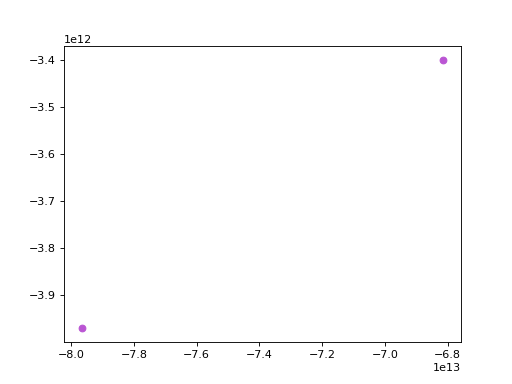

Number of differences:  2


In [68]:
find_differences(points_2, det_2, det_2_np)

<IPython.core.display.Javascript object>


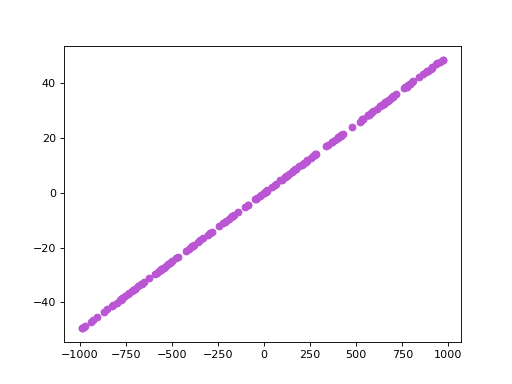

Number of differences:  170


In [69]:
find_differences(points_4, det_2, det_2_np)

<IPython.core.display.Javascript object>


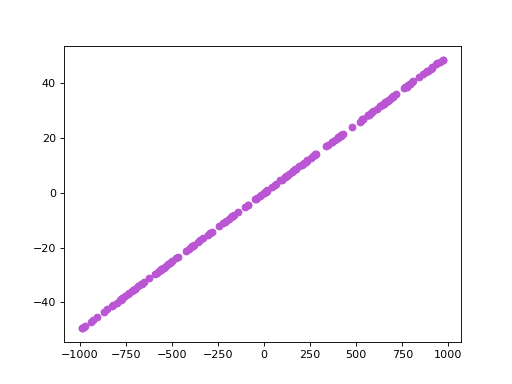

Number of differences:  170


In [71]:
find_differences(points_4, det_3, det_3_np)

Figure for set 1, det counted: 2x2, numpy way


<IPython.core.display.Javascript object>


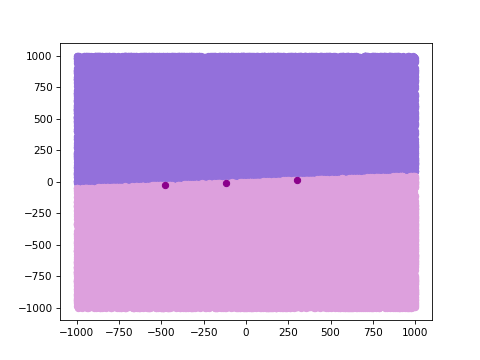

Left:  50105
Right:  49892
Collinear:  3


In [74]:
%matplotlib notebook
show_result(points_1, det_2_np, 1, '2x2, numpy way', 10**-18)

Figure for set 1, det counted: 2x2, my way


<IPython.core.display.Javascript object>


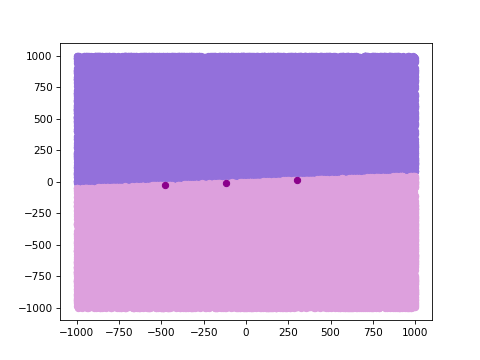

Left:  50105
Right:  49892
Collinear:  3


In [75]:
%matplotlib notebook
show_result(points_1, det_2, 1, '2x2, my way', 10**-18)

Figure for set 1, det counted: 2x2, my way


<IPython.core.display.Javascript object>


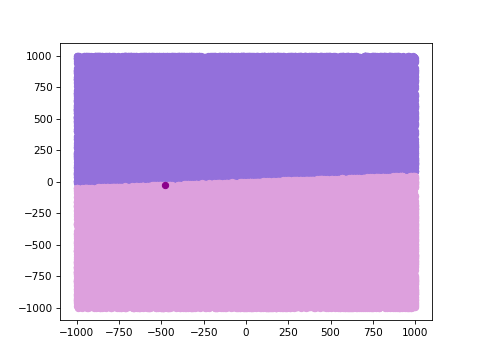

Left:  50106
Right:  49893
Collinear:  1


In [76]:
%matplotlib notebook
show_result(points_1, det_3, 1, 'my way', 10**-18)

Figure for set 1, det counted: numpy


<IPython.core.display.Javascript object>


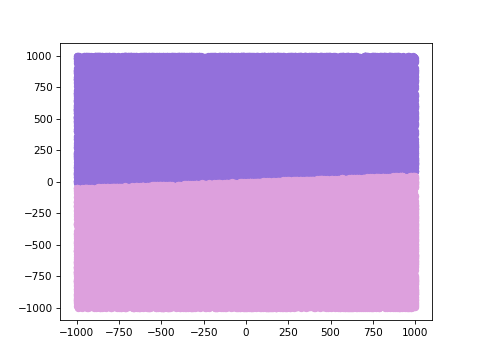

Left:  50107
Right:  49893
Collinear:  0


In [77]:
%matplotlib notebook
show_result(points_1, det_3_np, 1, 'numpy', 10**-18)

Figure for set 2, det counted: numpy method


<IPython.core.display.Javascript object>


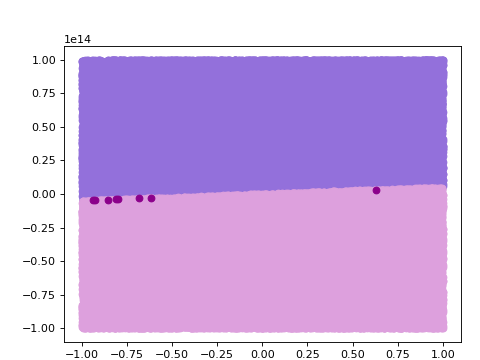

Left:  49909
Right:  50083
Collinear:  8


In [78]:
%matplotlib notebook
show_result(points_2, det_2_np, 2, 'numpy method', 10**-18)

Figure for set 2, det counted: my method


<IPython.core.display.Javascript object>


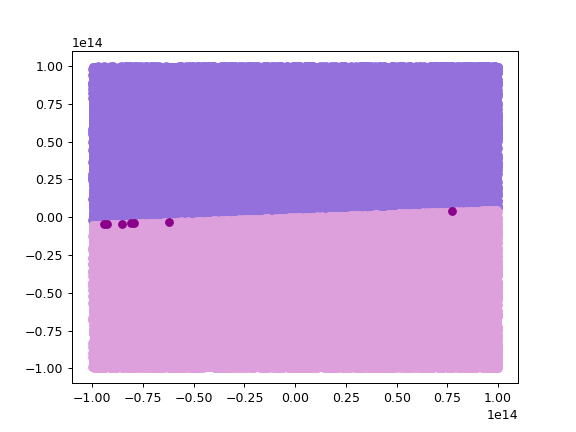

Left:  49909
Right:  50084
Collinear:  7


In [79]:
%matplotlib notebook
show_result(points_2, det_2, 2, 'my method', 10**-18)

Figure for set 2, det counted: my method


<IPython.core.display.Javascript object>


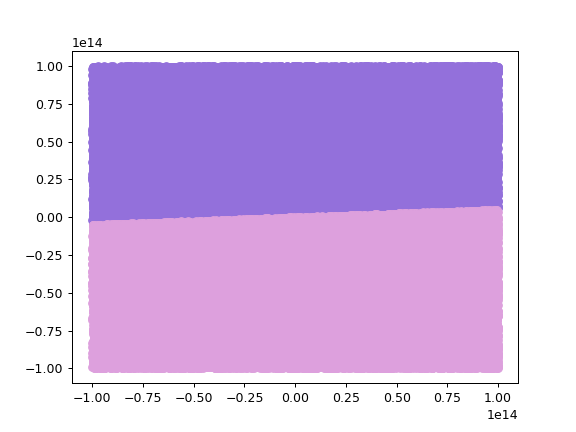

Left:  49912
Right:  50088
Collinear:  0


In [80]:
%matplotlib notebook
show_result(points_2, det_3, 2, 'my method', 10**-18)

Figure for set 2, det counted: numpy method


<IPython.core.display.Javascript object>


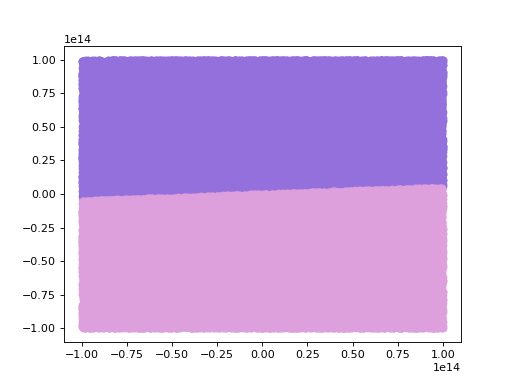

Left:  49912
Right:  50088
Collinear:  0


In [82]:
%matplotlib notebook
show_result(points_2, det_3_np, 2, 'numpy method', 10**-18)

Figure for set 3, det counted: 2x2, my function


<IPython.core.display.Javascript object>


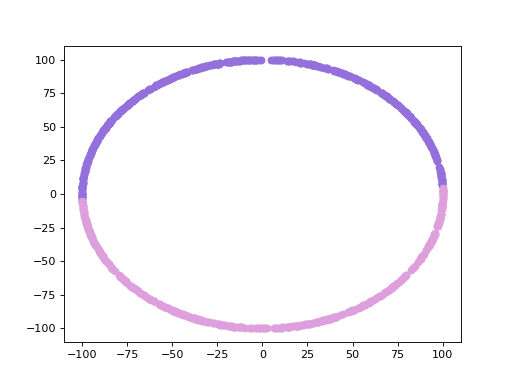

Left:  513
Right:  487
Collinear:  0


In [83]:
%matplotlib notebook
show_result(points_3, det_2, 3, '2x2, my function', 10**-18)

Figure for set 3, det counted: numpy


<IPython.core.display.Javascript object>


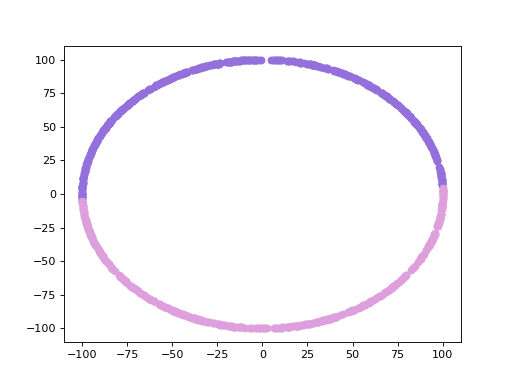

Left:  513
Right:  487
Collinear:  0


In [84]:
%matplotlib notebook
show_result(points_3, det_2_np, 3, 'numpy', 10**-18)

Figure for set 3, det counted:  my function


<IPython.core.display.Javascript object>


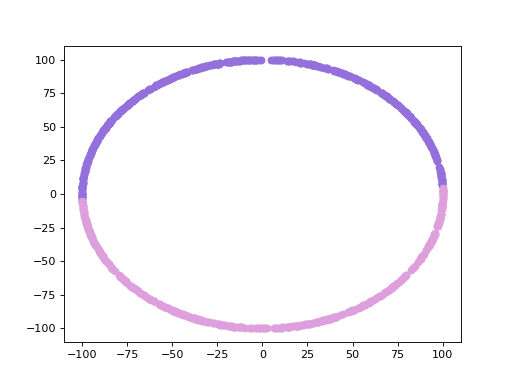

Left:  513
Right:  487
Collinear:  0


In [85]:
%matplotlib notebook
show_result(points_3, det_3, 3, ' my function', 10**-18)

Figure for set 3, det counted: numpy


<IPython.core.display.Javascript object>


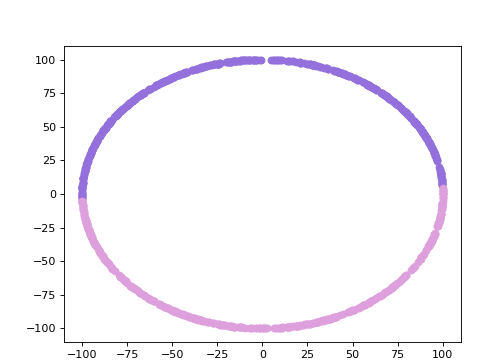

Left:  513
Right:  487
Collinear:  0


In [86]:
%matplotlib notebook
show_result(points_3, det_3_np, 3, 'numpy', 10**-18)

Figure for set 4, det counted:  my function


<IPython.core.display.Javascript object>


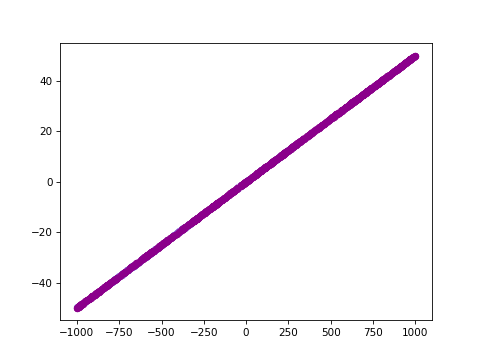

Left:  172
Right:  135
Collinear:  693


In [87]:
%matplotlib notebook
show_result(points_4, det_2, 4, ' my function', 10**-18)

Figure for set 4, det counted:  numpy


<IPython.core.display.Javascript object>


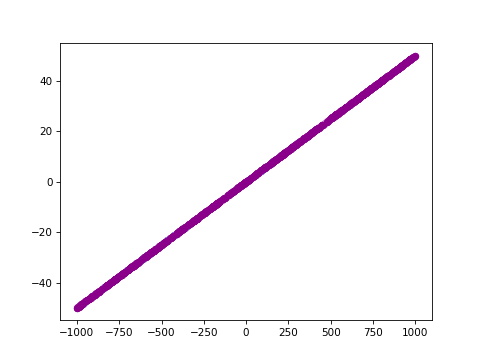

Left:  122
Right:  154
Collinear:  724


In [88]:
%matplotlib notebook
show_result(points_4, det_2_np, 4, ' numpy', 10**-18)

Figure for set 4, det counted:  my function


<IPython.core.display.Javascript object>


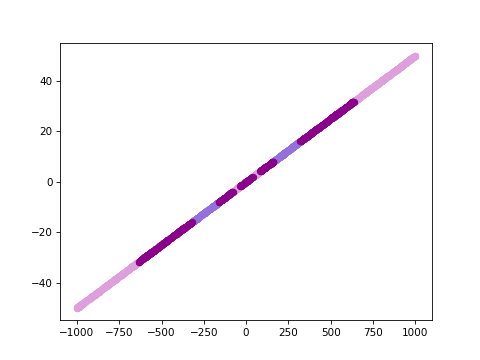

Left:  190
Right:  396
Collinear:  414


In [89]:
%matplotlib notebook
show_result(points_4, det_3, 4, ' my function', 10**-18)

Figure for set 4, det counted: numpy


<IPython.core.display.Javascript object>


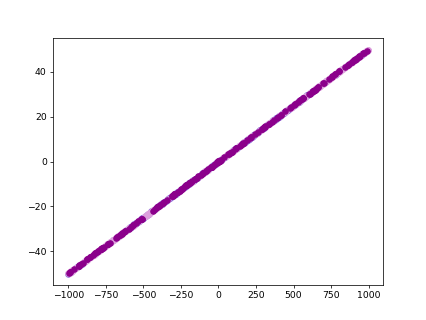

Left:  372
Right:  413
Collinear:  215


In [91]:
%matplotlib notebook
show_result(points_4, det_3_np, 4, 'numpy', 10**-18)

## Ponowne wygenrowanie punktów z zestawu 1 i ich klasyfikacja: 

Figure for set 1, det counted: 2x2, numpy way


<IPython.core.display.Javascript object>


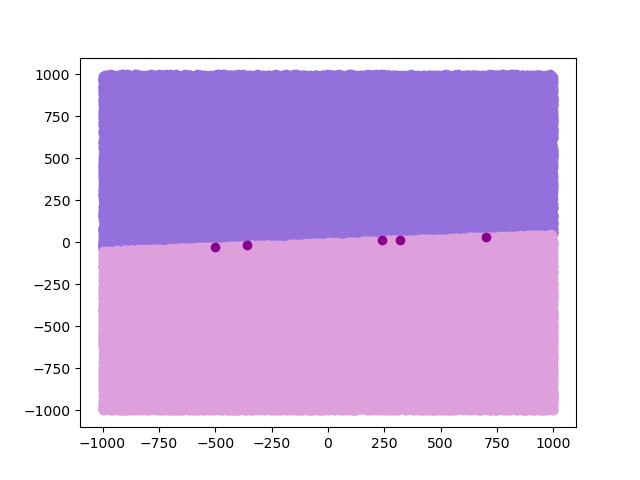

Left:  50125
Right:  49870
Collinear:  5


In [11]:
%matplotlib notebook
show_result(points_1, det_2_np, 1, '2x2, numpy way', 10**-14)

## Ponowne wygenrowanie punktów z zestawu 1 i ich klasyfikacja:

Figure for set 1, det counted: 2x2, numpy way


<IPython.core.display.Javascript object>


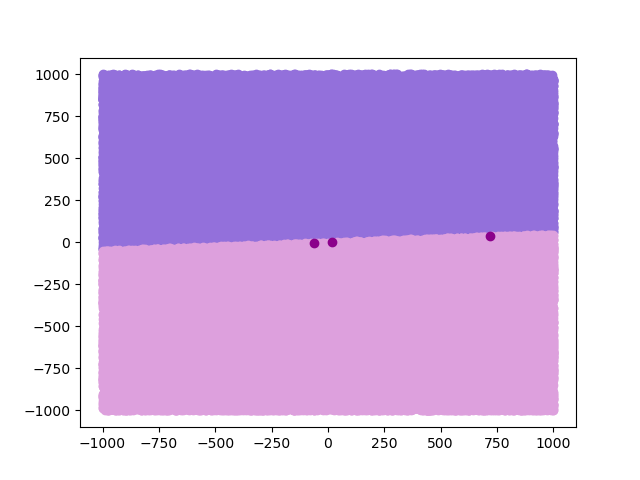

Left:  50141
Right:  49856
Collinear:  3


In [13]:
%matplotlib notebook
show_result(points_1, det_2_np, 1, '2x2, numpy way', 10**-14)

## Ponowne wygenrowanie punktów z zestawu 1 i ich klasyfikacja:

Figure for set 1, det counted: 2x2, numpy way


<IPython.core.display.Javascript object>


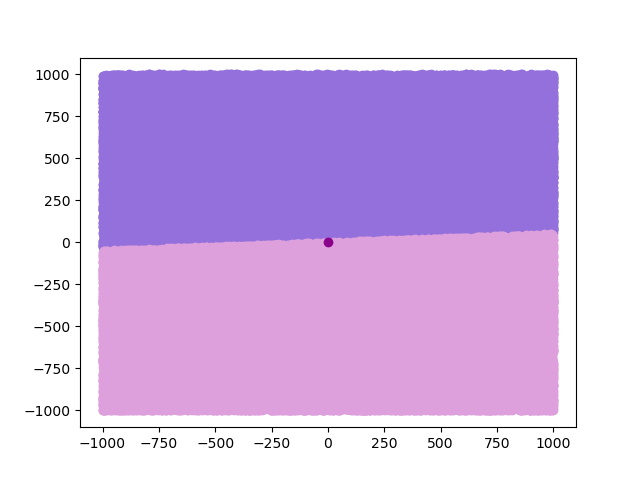

Left:  50019
Right:  49980
Collinear:  1


In [15]:
%matplotlib notebook
show_result(points_1, det_2_np, 1, '2x2, numpy way', 10**-14)